# _____________ ANÁLISIS PARA 01-07-2023 __________

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos del archivo CSV
df_solcast = pd.read_csv('../../Data/Cleaned/solcast_2023.csv', sep=',')
print(df_solcast.head())

   air_temp  albedo  clearsky_ghi  clearsky_gti  cloud_opacity  dewpoint_temp  \
0        11    0.14             0             0           79.5           10.3   
1        11    0.14             0             0           79.5           10.2   
2        11    0.14             0             0           79.5           10.2   
3        11    0.14             0             0           79.5           10.2   
4        11    0.14             0             0           79.5           10.2   

   GHI  gti            period_end period        Date    Time  
0    0    0  2023-01-01T00:05:00Z   PT5M  2023-01-01   19:05  
1    0    0  2023-01-01T00:10:00Z   PT5M  2023-01-01   19:10  
2    0    0  2023-01-01T00:15:00Z   PT5M  2023-01-01   19:15  
3    0    0  2023-01-01T00:20:00Z   PT5M  2023-01-01   19:20  
4    0    0  2023-01-01T00:25:00Z   PT5M  2023-01-01   19:25  


In [28]:
# filtrar datos del 01-07-2023 
df_solcast_day = df_solcast[df_solcast['Date'] == '2023-07-21']
print(df_solcast_day.head())

       air_temp  albedo  clearsky_ghi  clearsky_gti  cloud_opacity  \
57887        14    0.14             0             0           30.7   
57888        14    0.14             0             0           26.2   
57889        14    0.14             0             0           27.7   
57890        14    0.14             0             0           23.1   
57891        14    0.14             0             0           23.1   

       dewpoint_temp  GHI  gti            period_end period        Date  \
57887           10.0    0    0  2023-07-21T00:00:00Z   PT5M  2023-07-21   
57888           10.0    0    0  2023-07-21T00:05:00Z   PT5M  2023-07-21   
57889           10.0    0    0  2023-07-21T00:10:00Z   PT5M  2023-07-21   
57890            9.9    0    0  2023-07-21T00:15:00Z   PT5M  2023-07-21   
57891            9.9    0    0  2023-07-21T00:20:00Z   PT5M  2023-07-21   

         Time  
57887   19:00  
57888   19:05  
57889   19:10  
57890   19:15  
57891   19:20  


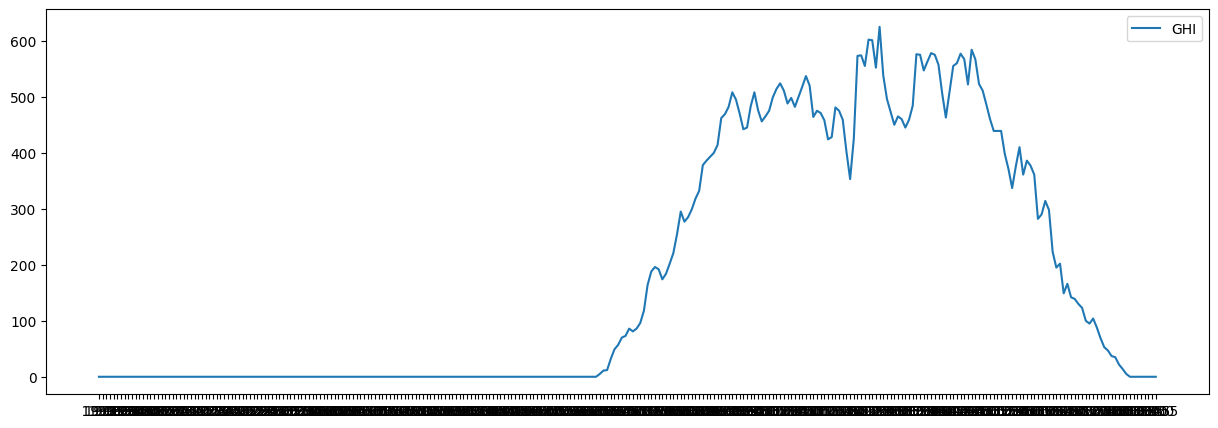

In [29]:
# graficar df_solcast_day
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df_solcast_day['Time'], df_solcast_day['GHI'], label='GHI')
plt.legend()
plt.show()


In [30]:
efficiency = 0.2094  # Eficiencia del panel solar
catidad_pv= 30
area =2.274*1.134

df_solcast_day['P'] = df_solcast_day['GHI'] * efficiency *  area * catidad_pv 

/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_2565/2927764319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solcast_day['P'] = df_solcast_day['GHI'] * efficiency *  area * catidad_pv


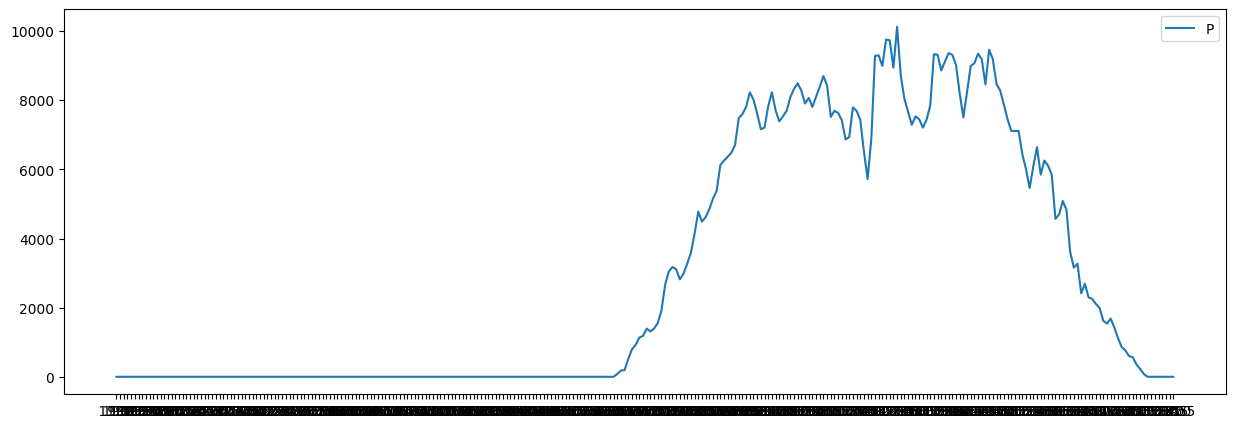

In [31]:
# grafica df_solcast_day['P']
plt.figure(figsize=(15, 5))
plt.plot(df_solcast_day['Time'], df_solcast_day['P'], label='P')
plt.legend()
plt.show()

In [32]:
# suma df_solcast_day['P'] multiplicado por 5/60
df_solcast_day['E'] = df_solcast_day['P'] * 5/60
print(df_solcast_day['E'].sum())

69657.8238216


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_2565/3914880905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solcast_day['E'] = df_solcast_day['P'] * 5/60


In [33]:
# normalizar df_solcast_day['E']
scaler = MinMaxScaler()
df_solcast_day['E_norm'] = scaler.fit_transform(df_solcast_day['E'].values.reshape(-1, 1))

# sumar df_solcast_day['E_norm'] multiplicado por 5/60
print(df_solcast_day['E_norm'].sum())

82.56


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_2565/413450719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solcast_day['E_norm'] = scaler.fit_transform(df_solcast_day['E'].values.reshape(-1, 1))


In [27]:
# error porcentual 50.833847 y 65.2463768115942
error = (65.2463768115942 - 50.833847) / 50.833847 * 100
print(error)

28.352231165180562
